<a href="https://colab.research.google.com/github/ricardoruiz19/TalentoTech/blob/main/analisis_sentiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install googletrans==3.1.0a0

import pandas as pd
from textblob import TextBlob
from googletrans import Translator


def translateComment(strComment:str):
    translator = Translator()
    strEngComment = translator.translate(strComment, src="es", dest="en")
    return strEngComment.text


def getPolarity(strComment:str):
    strComment = translateComment(strComment)
    analysis = TextBlob(strComment)
    return analysis.sentiment.polarity



# Cargamos el dataset
df = pd.read_csv('Comentarios.csv')
df['polaridad'] = df['Comentario'].apply(getPolarity)



df.to_csv('resultados.csv', index=False)

In [4]:
df = pd.read_csv('/content/resultados.csv')
display(df)

,Comentario,polaridad
0,La comida fue excelente y el servicio fue exce...,0.555556
1,El ambiente era agradable y la comida estaba d...,0.261458
2,"La comida estaba bien, pero el servicio fue le...",0.200000
3,"No me gustó la comida, estaba fría y el sabor ...",-0.475000
4,El peor restaurante en el que he estado. No lo...,-1.000000
...,...,...
66,Siempre disfruto venir aquí. La comida es deli...,0.629167
67,"Buen lugar para cenar, aunque el servicio pued...",0.070833
68,"La comida está bien, pero el ambiente no es mu...",0.208974
69,No me gustó la comida y el servicio fue muy de...,-0.520000


In [6]:
#!pip install googletrans==3.1.0a0

def translateComment(strComment:str):
    translator = Translator()
    strEngComment = translator.translate(strComment, src="es", dest="en")
    return strEngComment.text

def getPolarity(strComment:str):
    strComment = translateComment(strComment)
    analysis = TextBlob(strComment)
    return analysis.sentiment.polarity

# Cargamos el dataset
df_mod = pd.read_csv('Comentarios_mod.csv')
df_mod['polaridad'] = df_mod['Comentario'].apply(getPolarity)



df_mod.to_csv('resultados_mod.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'Comentarios_mod.csv'

In [8]:
df_mod = pd.read_csv('/content/resultados.csv')
#display(df_mod)
df_mod.head(10)


,Comentario,polaridad
0,La comida fue excelente y el servicio fue exce...,0.555556
1,El ambiente era agradable y la comida estaba d...,0.261458
2,"La comida estaba bien, pero el servicio fue le...",0.200000
3,"No me gustó la comida, estaba fría y el sabor ...",-0.475000
4,El peor restaurante en el que he estado. No lo...,-1.000000
5,¡Increíble! El mejor lugar para cenar con amig...,1.000000
6,Buena comida y buena música. Un lugar agradabl...,0.666667
7,"La comida era decente, pero no vale el precio ...",0.008333
8,El servicio fue terrible y la comida llegó tar...,-0.633333
9,Muy mala experiencia. El personal fue grosero ...,-0.736667


In [12]:
df = pd.read_csv('Comentarios.csv')

In [13]:
df.head(10)

,Comentario
0,La comida fue excelente y el servicio fue exce...
1,El ambiente era agradable y la comida estaba d...
2,"La comida estaba bien, pero el servicio fue le..."
3,"No me gustó la comida, estaba fría y el sabor ..."
4,El peor restaurante en el que he estado. No lo...
5,¡Increíble! El mejor lugar para cenar con amig...
6,Buena comida y buena música. Un lugar agradabl...
7,"La comida era decente, pero no vale el precio ..."
8,El servicio fue terrible y la comida llegó tar...
9,Muy mala experiencia. El personal fue grosero ...


In [18]:
# AGREGADO

import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [22]:
# AGREGADO

def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

df['Comentario'] = df['Comentario'].apply(remove_punctuation)
df.head(10)

,Comentario
0,La comida fue excelente y el servicio fue exce...
1,El ambiente era agradable y la comida estaba d...
2,La comida estaba bien pero el servicio fue len...
3,No me gustó la comida estaba fría y el sabor n...
4,El peor restaurante en el que he estado No lo ...
5,¡Increíble El mejor lugar para cenar con amigo...
6,Buena comida y buena música Un lugar agradable...
7,La comida era decente pero no vale el precio q...
8,El servicio fue terrible y la comida llegó tar...
9,Muy mala experiencia El personal fue grosero y...


In [21]:
# AGREGADO

import nltk
nltk.download('stopwords')

# extracting the stopwords from nltk library
sw = stopwords.words('spanish')
# displaying the stopwords
np.array(sw)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


array(['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las',
       'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como',
       'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque',
       'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me',
       'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos',
       'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese',
       'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos',
       'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa',
       'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco',
       'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi',
       'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras',
       'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo',
       'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas',
       'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra',
 

In [25]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

df['Comentario'] = df['Comentario'].apply(stopwords)
df.head(10)

,Comentario
0,comida excelente servicio excepcional definiti...
1,ambiente agradable comida deliciosa aunque cara
2,comida bien servicio lento atento
3,gustó comida fría sabor bueno
4,peor restaurante recomiendo
5,¡increíble mejor lugar cenar amigos familiares
6,buena comida buena música lugar agradable pasa...
7,comida decente vale precio cobran
8,servicio terrible comida llegó tarde fría
9,mala experiencia personal grosero comida horrible


<Axes: >

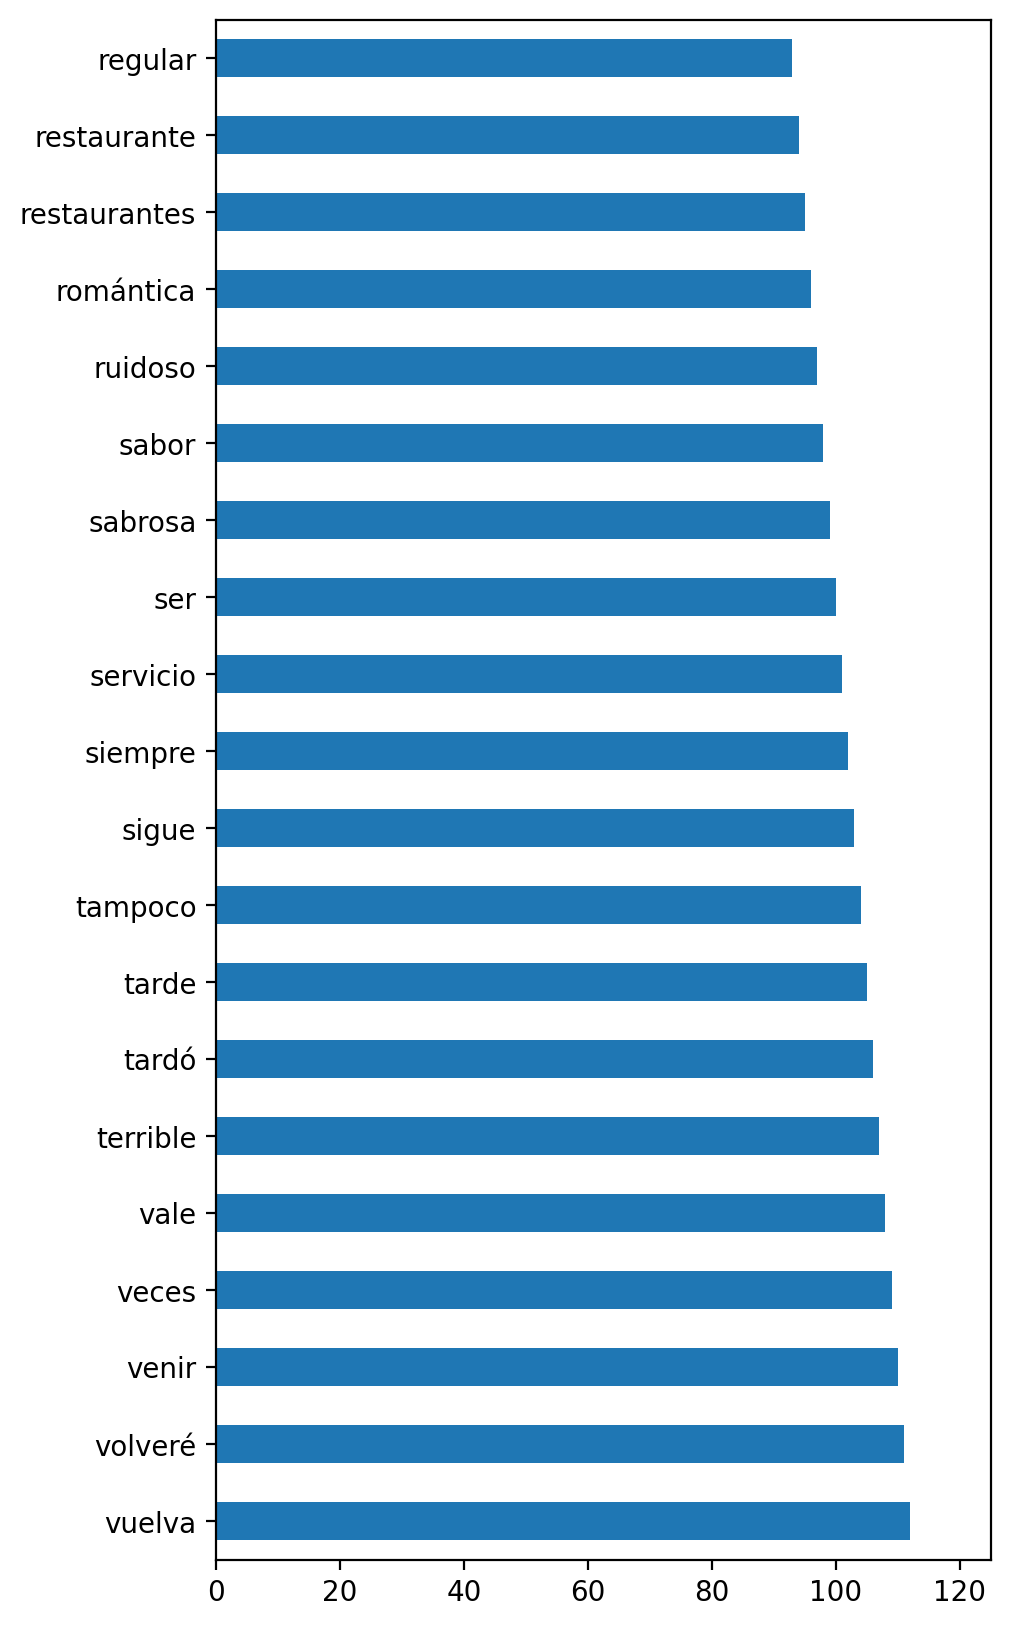

In [32]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['Comentario'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)



top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (0, 125))